In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

##################################################### OVERALL CRIME SCORE #########################################################################

filepath = '/Users/justineleaclement/Documents/Projets /Australia_SubProjet/merged_inner_df.csv'
merged_df = pd.read_csv(filepath)
merged_df = merged_df.drop('__url_x', axis=1)
merged_df.head()

,suburb_name,_google_import_B,suburb_population,suburb_median_age,suburb_number_of_families,suburb_number_of_private_dwellings,suburb_number_of_people_per_household,suburb_financial_median_monthly_mortgage_repayments,suburb_financial_median_weekly_household_income,suburb_transport_average_car_per_dwelling,...,violent_crimes_per_1000_people,percentage_suburbs_with_less_violet_crimes,percentage_suburbs_with_less_property_crimes,top_crime_types,changes_of_being_a_victim_of_a_violent_crime_in_suburb,chances_of_being_a_victim_of_violent_crime_in_state,chances_of_being_a_violent_victim_in_australia,chances_of_being_a_property_victim_in_suburb,chances_of_being_a_property_victim_in_state,chances_of_being_a_property_victim_in_australia
0,Adaminaby,https://abs.gov.au/census/find-census-data/qui...,339,52.0,74,224,2.0,"$1,083",$954,2.2,...,14.75,88.05%,53.67%,Top crime types: Justice procedures offences I...,1 in 68,1 in 97,1 in 105,1 in 85,1 in 44,1 in 31
1,Albury,https://abs.gov.au/census/find-census-data/qui...,"4,955",45.0,"1,236","2,630",2.0,"$1,733","$1,601",1.5,...,63.98,98.03%,97.47%,Top crime types: Theft In 2022 in Albury there...,1 in 16,1 in 97,1 in 105,1 in 6,1 in 44,1 in 31
2,Alectown,https://abs.gov.au/census/find-census-data/qui...,151,49.0,43,67,2.4,"$1,257","$1,803",2.2,...,19.87,91.63%,67.51%,Top crime types: Assault and related offences ...,1 in 50,1 in 97,1 in 105,1 in 50,1 in 44,1 in 31
3,Alpine,https://abs.gov.au/census/find-census-data/qui...,141,49.0,42,61,2.8,"$3,033","$2,291",3.3,...,0.00,0%,69.5%,Top crime types: Theft In 2022 in Alpine there...,1 in INF,1 in 97,1 in 105,1 in 47,1 in 44,1 in 31
4,Argoon,https://abs.gov.au/census/find-census-data/qui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0%,0%,Top crime types:,1 in INF,1 in 97,1 in 105,1 in INF,1 in 44,1 in 31


In [10]:
#The three crime variables used to calculate the crime rate in an suburb 

crime_columns = [
    'suburb_crime_per_1000_people',
    'violent_crimes_per_1000_people',
    'property_crimes'
]
print('The crime variables used to calculate the crime rate in an suburb:')
print("suburb_crime_per_1000_people")
print("property_crimes")
print("violent_crimes_per_1000_people")

merged_df[crime_columns] = merged_df[crime_columns].apply(pd.to_numeric, errors='coerce')

for col in crime_columns:
    merged_df[col + '_rank'] = merged_df[col].rank(method='dense')

# Define a function to scale values to a 1-10 range
def scale_to_1_to_10(value):
    min_val = value.min()
    max_val = value.max()
    return ((value - min_val) / (max_val - min_val)) * 9 + 1

# Apply the scaling function to each column
for col in crime_columns:
    merged_df[col + '_Mapped_Score'] = scale_to_1_to_10(merged_df[col + '_rank'])

The crime variables used to calculate the crime rate in an suburb
suburb_crime_per_1000_people
property_crimes
violent_crimes_per_1000_people


In [5]:
# Calculate the overall average score across the columns
merged_df['Crime_Score_'] = round(merged_df[[col + '_Mapped_Score' for col in crime_columns]].mean(axis=1))
print("Overall Crime Score:", merged_df['Crime_Score_'])

# See the count of each score
crime_score_counts = merged_df['Crime_Score_'].value_counts()
print('*********Crime Score counts***********', crime_score_counts)

# Count the number of NaN values in the 'Overall_Crime_Score' column
nan_count = merged_df['Crime_Score_'].isnull().sum()
print("Number of NaN values in Overall_Crime_Score:", nan_count)


Overall Crime Score: 0        5.0
1        9.0
2        4.0
3        2.0
4        1.0
        ... 
15314    NaN
15315    NaN
15316    NaN
15317    NaN
15318    3.0
Name: Crime_Score_, Length: 15319, dtype: float64
*********Crime Score counts*********** 1.0     4082
2.0     2849
3.0     2520
4.0     1620
5.0     1026
6.0      791
7.0      437
8.0      151
9.0       87
10.0      19
Name: Crime_Score_, dtype: int64
Number of NaN values in Overall_Crime_Score: 1737


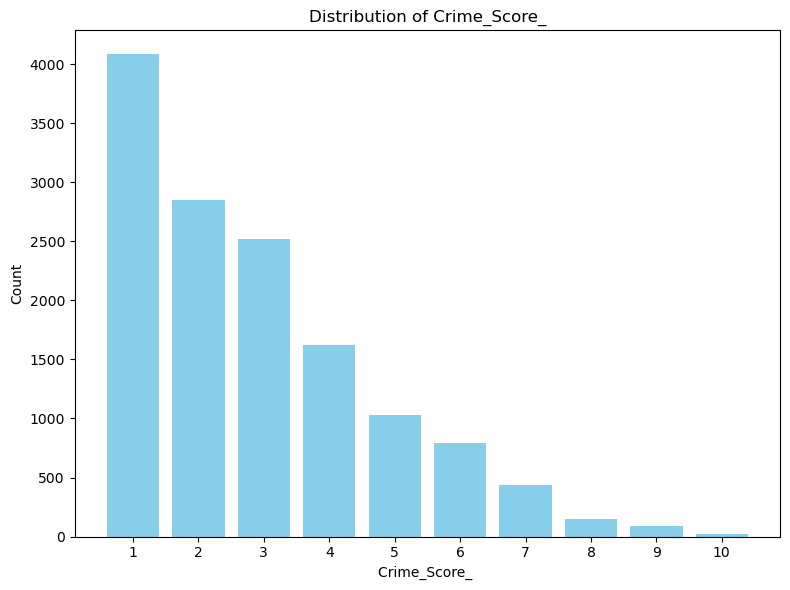

In [6]:
value_counts = merged_df['Crime_Score_'].value_counts()
sorted_value_counts = value_counts.sort_index()

# Bar plot for 'Crime_Score_' distribution
plt.figure(figsize=(8, 6))
plt.bar(sorted_value_counts.index, sorted_value_counts.values, color='skyblue')
plt.xlabel('Crime_Score_ ')
plt.ylabel('Count')
plt.title('Distribution of Crime_Score_')
plt.xticks(sorted_value_counts.index)
plt.tight_layout()
plt.show()